Linear Regression 

In [18]:
#Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats



In [19]:
#Import and read Data
full_health_data = pd.read_csv("data.csv", header=0, sep=",")

In [20]:
# Counting columns and rows
count_data_column = full_health_data.shape[1]
print("Columns: ", count_data_column)
count_data_row= full_health_data.shape[0]
print("Rows: ", count_data_row)

Columns:  6
Rows:  163


In [23]:
#Display the first 10 rows of DataFrame as a table
full_health_data.head(20)

,Duration,Average_Pulse,Max_Pulse,Calorie_Burnage,Hours_Work,Hours_Sleep
0,60,110,130,409,0.0,8.0
1,60,117,145,479,0.0,8.0
2,60,103,135,340,8.0,7.5
3,45,109,175,282,8.0,8.0
4,45,117,148,406,0.0,6.5
5,60,102,127,300,0.0,7.5
6,60,110,136,374,0.0,7.5
7,45,104,134,253,0.0,9.0
8,30,109,133,195,8.0,8.0
9,60,98,124,269,7.5,8.0


Data Cleaning

In [25]:
full_health_data.dropna(axis = 0, inplace= True)

full_health_data.info() #check the data types
# We can’t use the object type of Data,
#So if we found Object data use "astype()" function and convert to float or int
#Example -->  full_health_data["Max_Pluse"].astype(float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Duration         163 non-null    int64  
 1   Average_Pulse    163 non-null    int64  
 2   Max_Pulse        163 non-null    int64  
 3   Calorie_Burnage  163 non-null    int64  
 4   Hours_Work       163 non-null    float64
 5   Hours_Sleep      163 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 7.8 KB


All Data types can be calulateble and analysable , Start analyzing the data

Mathematical Functions 

In [22]:
#Finding Maximun value
max_average_pulse = full_health_data["Average_Pulse"].max()
print("Maximum average pulse: ", max_average_pulse)

#Finding Minimum value
min_average_pulse = full_health_data["Average_Pulse"].min()
print("Minimum average pulse: ", min_average_pulse)

#Finding Mean value
mean_average_pulse = np.mean( full_health_data["Average_Pulse"])
print("Mean value of  average pulse: ", mean_average_pulse)


Maximum average pulse:  159
Minimum average pulse:  80
Mean value of  average pulse:  107.7239263803681


Statistic Function

In [27]:
full_health_data.describe()

,Duration,Average_Pulse,Max_Pulse,Calorie_Burnage,Hours_Work,Hours_Sleep
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,64.263804,107.723926,134.226994,382.368098,4.386503,7.680982
std,42.994520,14.625062,16.403967,274.227106,3.923772,0.663934
min,15.000000,80.000000,100.000000,50.000000,0.000000,5.000000
25%,45.000000,100.000000,124.000000,256.500000,0.000000,7.500000
50%,60.000000,105.000000,131.000000,320.000000,5.000000,8.000000
75%,60.000000,111.000000,141.000000,388.500000,8.000000,8.000000
max,300.000000,159.000000,184.000000,1860.000000,11.000000,12.000000


Linear Function : output = slope * input + intercept

(--> To find the relationship between two variable: choose Average_Pulse and Calorie_Burnage)

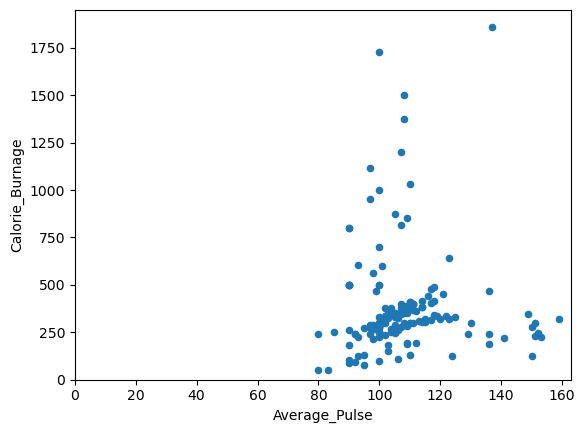

In [38]:
import sys
plt.close('all')
matplotlib.use("Agg")
matplotlib.use("module://ipykernel.pylab.backend_inline")

full_health_data.plot(x= "Average_Pulse", y= "Calorie_Burnage", kind= "scatter")
plt.ylim(ymin=0)
plt.xlim(xmin=0)

plt.show()

Findig slope and intercept

In [44]:
# extracts the columns
x= full_health_data["Average_Pulse"]
y= full_health_data["Calorie_Burnage"]

slope_intercept = np.polyfit(x,y,1)

print(slope_intercept)
print("Slope:", round(slope,2))#large Slope may strong relationship 
print("Intercept:",round(intercept,2))#intercept shows the value of y when x is not present


[3.29563474e-01 3.46866227e+02]
Slope: 0.33
Intercept: 346.87


Visualizing the Correlation Between Variables by Using Heatmap

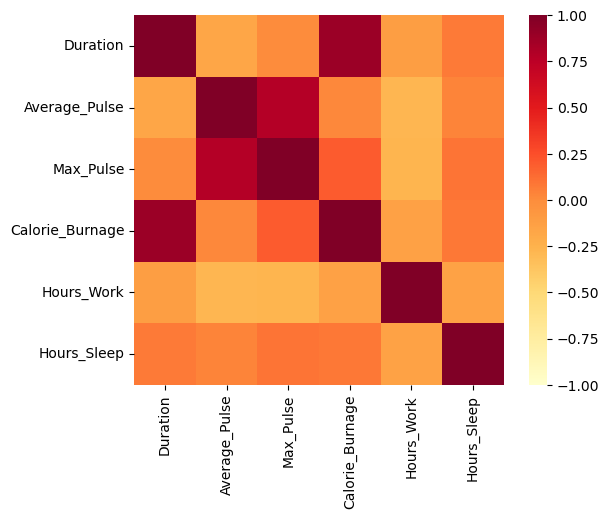

In [47]:
import seaborn as sns

correlation_full_health = full_health_data.corr()
axis_corr = sns.heatmap(correlation_full_health, 
                        vmin= -1, vmax=1, center=0,
                       cmap= "YlOrRd",
                       square= True)

plt.show()

Linear Regression

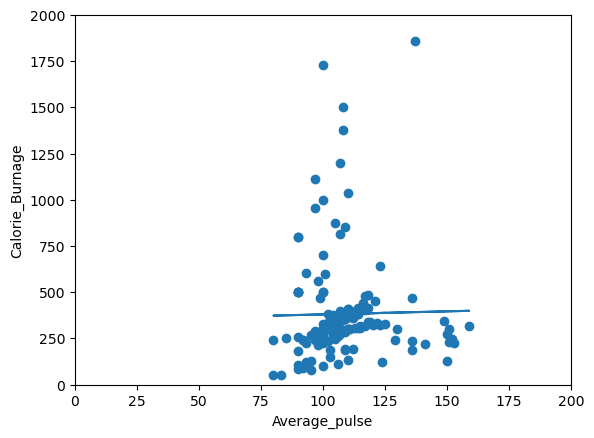

In [5]:

#Perform linear regression
slope, intercept, r, p, std_err = stats.linregress(x, y)

#Define the regression line function
def myfunc(x):
  return slope * x + intercept #linear Regression 

#Calculate the predicted values
mymodel = list(map(myfunc, x))

plt.scatter(x, y)#create the scatter plot
plt.plot(x, slope*x + intercept)#Plot the regression line
plt.ylim(ymin=0, ymax=2000)#Set the y-axis limits
plt.xlim(xmin=0, xmax=200)#Set the x-axis limits
plt.xlabel ("Average_pulse")#Set the x-axis label
plt.ylabel("Calorie_Burnage")#Set the y-axis label

plt.show() #Display the plot

In [7]:
#Two lines to make our compiler able to draw
import io
buffer = io.BytesIO()
plt.savefig(buffer, format="png")  # Save the plot to the buffer

<Figure size 640x480 with 0 Axes>

Regression Table

In [48]:
import statsmodels.formula.api as smf

model= smf.ols("Calorie_Burnage ~ Average_Pulse ", data= full_health_data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Calorie_Burnage   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                   0.04975
Date:                Sun, 12 May 2024   Prob (F-statistic):              0.824
Time:                        10:12:15   Log-Likelihood:                -1145.8
No. Observations:                 163   AIC:                             2296.
Df Residuals:                     161   BIC:                             2302.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       346.8662    160.615      2.160

-- > Information Part in Regression Table 
Dep. Variable(y) = Calorie_Burnage and using Ordinary Least Squares model

--> Coefficients Part in Regression Table
Coef is the output of Linear regression function,
If Average_Pulse increases by 1, Calorie_Burnage increases by 0.3296 (or 0,3 rounded)
If Average_Pulse = 0, the Calorie_Burnage is equal to 346.8662 (or 346.9 rounded).

Define the Linear Regression Function to perform predictions

In [49]:
def Predict_Calorie_Burnage(Average_Pulse):
    return (0.3296 * Average_Pulse + 346.8662)

print(Predict_Calorie_Burnage(120))
print(Predict_Calorie_Burnage(130))
print(Predict_Calorie_Burnage(150))
print(Predict_Calorie_Burnage(180))

386.4182
389.7142
396.3062
406.1942


--> Hypothesis Testing and P-value

The P-value of Average_Pulse is 0.824. So, we cannot conclude a relationship between Average_Pulse and Calorie_Burnage.
A low P-value (< 0.05) means that the coefficient is likely not to equal zero.
A high P-value (> 0.05) means that we cannot conclude that the explanatory variable




--> R - Squared

To ckeck how well the linear regression model fits the data points

The value of R-Squared is always between 0 to 1 (0% to 100%).

A high R-Squared value means that many data points are close to the linear regression function line.
A low R-Squared value means that the linear regression function line does not fit the data well.

Our regression model shows a R-Squared value of zero, which means that the linear regression function line does not fit the data well.

>> " Thank You So much for your attention !! "